# IMPORTS AND CONFIGURATIONS

## notes

In [1]:
import yfinance as yf
import pandas as pd 
import numpy as np
import os
import pathlib
import glob
import urllib
import zipfile
import datetime as dt 
from tqdm import tqdm
from sklearn.linear_model import LinearRegression #prediction
import pandas_datareader as web
from dateutil.relativedelta import *
from pandas.tseries.offsets import *
import statsmodels as sm

idx=pd.IndexSlice

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 80%; }
    div#maintoolbar-container { width: 60%; }
</style>
"""))

pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 350)

In [7]:
dissertation_folder=os.getcwd()+os.sep
dissertation_folder 

'C:\\Andrea\\Tutoring\\Tutoring Coding\\Adam\\practice\\practice3\\'

In [ ]:
if not os.path.exists('data'):
    os.makedirs('data')

In [ ]:
data_folder=os.path.join(os.getcwd(),'data')+os.sep
data_folder

# Yfinance

Documentation https://pypi.org/project/yfinance/

1. first Item 
2. s....

- hi
- nello




## Example 1

In [2]:
import yfinance as yf

msft = yf.Ticker("MSFT")

In [4]:
# get stock info
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certifica

In [ ]:
# get historical market data
hist = msft.history(period="max")

In [152]:
# show actions (dividends, splits)
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21,0.00,2.0
1990-04-16,0.00,2.0
1991-06-27,0.00,1.5
1992-06-15,0.00,1.5
1994-05-23,0.00,2.0
1996-12-09,0.00,2.0
1998-02-23,0.00,2.0
1999-03-29,0.00,2.0
2003-02-18,0.00,2.0


In [15]:
# show dividends
msft.sustainability

,Value
2021-5,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,9.37
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [ ]:
# show splits
msft.splits

# show financials
msft.financials
msft.quarterly_financials

# show major holders
msft.major_holders

# show institutional holders
msft.institutional_holders

# show balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet

# show cashflow
msft.cashflow
msft.quarterly_cashflow

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations

# show next event (earnings, etc)
msft.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# get option chain for specific expiration
opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

## Example 2

In [89]:
stocktick

['AAPL', 'MSFT', 'GME', 'DOGE-USD']

In [92]:
#join elements of a list by the character you want: string.join(list)
" ".join(stocktick)

'AAPL MSFT GME DOGE-USD'

In [149]:
data = yf.download(stocktick, start="2017-01-01", end="2017-04-30", interval='5d', group_by="ticker")
data

[*********************100%***********************]  4 of 4 completed


MSFT                                                          \
                 Open       High        Low      Close  Adj Close      Volume   
Date                                                                            
2016-12-31        NaN        NaN        NaN        NaN        NaN         NaN   
2017-01-05  62.189999  62.660000  62.029999  62.299999  58.142242  24876000.0   
2017-01-10  62.730000  63.070000  62.279999  62.619999  58.440891  18593000.0   
2017-01-15        NaN        NaN        NaN        NaN        NaN         NaN   
2017-01-20  62.669998  62.820000  62.369999  62.740002  58.552891  30213500.0   
2017-01-25  63.950001  64.099998  63.450001  63.680000  59.430153  23672700.0   
2017-01-30  65.690002  65.790001  64.800003  65.129997  60.783371  31651400.0   
2017-02-04        NaN        NaN        NaN        NaN        NaN         NaN   
2017-02-09  63.520000  64.440002  63.320000  64.059998  59.784790  22644400.0   
2017-02-14  64.410004  64.720001  64.019997  64.570000  60.626099  23108400.0   
2017-02-19        NaN        NaN        NaN        NaN        NaN         NaN   
2017-02-24  64.529999  64.800003  64.139999  64.620003  60.673031  21796800.0   
2017-03-01  64.129997  64.989998  64.019997  64.940002  60.973499  26937500.0   
2017-03-06  63.970001  64.559998  63.810001  64.269997  60.344402  18750300.0   
2017-03-10        NaN        NaN        NaN        NaN        NaN         NaN   
2017-03-11        NaN        NaN        NaN        NaN        NaN         NaN   
2017-03-16  64.750000  64.760002  64.300003  64.639999  60.691811  20674300.0   
2017-03-21  65.190002  65.500000  64.129997  64.209999  60.288074  26640500.0   
2017-03-26        NaN        NaN        NaN        NaN        NaN         NaN   
2017-03-31  65.650002  66.190002  65.449997  65.860001  61.837299  21040300.0   
2017-04-05  66.300003  66.349998  65.440002  65.559998  61.555614  21448600.0   
2017-04-10  65.610001  65.820000  65.360001  65.529999  61.527431  17952700.0   
2017-04-15        NaN        NaN        NaN        NaN        NaN         NaN   
2017-04-20  65.459999  65.750000  65.139999  65.500000  61.499290  22299500.0   
2017-04-25  67.900002  68.040001  67.599998  67.919998  63.771481  30242700.0   

            DOGE-USD                                                     \
                Open      High       Low     Close Adj Close     Volume   
Date                                                                      
2016-12-31  0.000227  0.000228  0.000223  0.000223  0.000223    73496.0   
2017-01-05  0.000233  0.000257  0.000221  0.000229  0.000229   994730.0   
2017-01-10  0.000229  0.000231  0.000220  0.000226  0.000226   204249.0   
2017-01-15  0.000207  0.000210  0.000202  0.000206  0.000206    77839.0   
2017-01-20  0.000209  0.000212  0.000205  0.000209  0.000209    72040.0   
2017-01-25  0.000203  0.000205  0.000200  0.000204  0.000204    71636.0   
2017-01-30  0.000204  0.000210  0.000203  0.000208  0.000208    60616.0   
2017-02-04  0.000213  0.000214  0.000206  0.000211  0.000211   113546.0   
2017-02-09  0.000208  0.000216  0.000201  0.000204  0.000204   200542.0   
2017-02-14  0.000208  0.000213  0.000205  0.000209  0.000209   129514.0   
2017-02-19  0.000197  0.000210  0.000196  0.000208  0.000208    74856.0   
2017-02-24  0.000208  0.000211  0.000202  0.000208  0.000208   118202.0   
2017-03-01  0.000206  0.000209  0.000201  0.000203  0.000203   136870.0   
2017-03-06  0.000210  0.000213  0.000205  0.000210  0.000210   111585.0   
2017-03-10       NaN       NaN       NaN       NaN       NaN        NaN   
2017-03-11  0.000205  0.000213  0.000200  0.000211  0.000211   142059.0   
2017-03-16  0.000241  0.000244  0.000228  0.000235  0.000235   448480.0   
2017-03-21  0.000227  0.000248  0.000227  0.000246  0.000246   243988.0   
2017-03-26  0.000298  0.000309  0.000271  0.000272  0.000272  1203110.0   
2017-03-31  0.000304  0.000360  0.000299  0.000328  0.000328  2525700.0   
2017-04-05  0.000438  0

In [110]:
data=data.swaplevel(i=0, j=1, axis=1)
data

,AAPL,DOGE-USD,GME,MSFT,AAPL,DOGE-USD,GME,MSFT,AAPL,DOGE-USD,GME,MSFT,AAPL,DOGE-USD,GME,MSFT,AAPL,DOGE-USD,GME,MSFT,AAPL,DOGE-USD,GME,MSFT
,Adj Close,Adj Close,Adj Close,Adj Close,Close,Close,Close,Close,High,High,High,High,Low,Low,Low,Low,Open,Open,Open,Open,Volume,Volume,Volume,Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,
2016-12-31,NaN,0.000223,NaN,NaN,NaN,0.000223,NaN,NaN,NaN,0.000228,NaN,NaN,NaN,0.000223,NaN,NaN,NaN,0.000227,NaN,NaN,NaN,73496,NaN,NaN
2017-01-01,NaN,0.000228,NaN,NaN,NaN,0.000228,NaN,NaN,NaN,0.000228,NaN,NaN,NaN,0.000221,NaN,NaN,NaN,0.000223,NaN,NaN,NaN,136829,NaN,NaN
2017-01-02,NaN,0.000226,NaN,NaN,NaN,0.000226,NaN,NaN,NaN,0.000230,NaN,NaN,NaN,0.000222,NaN,NaN,NaN,0.000228,NaN,NaN,NaN,195520,NaN,NaN
2017-01-03,27.372362,0.000227,20.631744,58.403568,29.037500,0.000227,25.370001,62.580002,29.082500,0.000228,25.469999,62.840000,28.690001,0.000222,25.020000,62.130001,28.950001,0.000224,25.440001,62.790001,115127600.0,132352,1941400.0,20694100.0
2017-01-04,27.341724,0.000236,21.079020,58.142242,29.004999,0.000236,25.920000,62.299999,29.127501,0.000239,26.049999,62.750000,28.937500,0.000225,25.580000,62.119999,28.962500,0.000227,25.580000,62.480000,84472400.0,442095,2244300.0,21340000.0
2017-01-05,27.480770,0.000229,20.330845,58.142242,29.152500,0.000229,25.000000,62.299999,29.215000,0.000257,25.559999,62.660000,28.952499,0.000221,24.900000,62.029999,28.980000,0.000233,25.559999,62.189999,88774400.0,994730,3037700.0,24876000.0
2017-01-06,27.787130,0.000220,19.940495,58.646210,29.477501,0.000220,24.520000,62.840000,29.540001,0.000235,25.170000,63.150002,29.117500,0.000218,24.500000,62.040001,29.195000,0.000228,25.150000,62.299999,127007600.0,305084,2333600.0,19922900.0
2017-01-07,NaN,0.000221,NaN,NaN,NaN,0.000221,NaN,NaN,NaN,0.000228,NaN,NaN,NaN,0.000216,NaN,NaN,NaN,0.000222,NaN,NaN,NaN,315096,NaN,NaN


In [167]:
data.columns=data.columns.sortlevel(level=0, ascending=True)[0]
data

MSFT                                                          \
                 Open       High        Low      Close  Adj Close      Volume   
Date                                                                            
2016-12-31        NaN        NaN        NaN        NaN        NaN         NaN   
2017-01-05  62.189999  62.660000  62.029999  62.299999  58.142242  24876000.0   
2017-01-10  62.730000  63.070000  62.279999  62.619999  58.440891  18593000.0   
2017-01-15        NaN        NaN        NaN        NaN        NaN         NaN   
2017-01-20  62.669998  62.820000  62.369999  62.740002  58.552891  30213500.0   
2017-01-25  63.950001  64.099998  63.450001  63.680000  59.430153  23672700.0   
2017-01-30  65.690002  65.790001  64.800003  65.129997  60.783371  31651400.0   
2017-02-04        NaN        NaN        NaN        NaN        NaN         NaN   
2017-02-09  63.520000  64.440002  63.320000  64.059998  59.784790  22644400.0   
2017-02-14  64.410004  64.720001  64.019997  64.570000  60.626099  23108400.0   
2017-02-19        NaN        NaN        NaN        NaN        NaN         NaN   
2017-02-24  64.529999  64.800003  64.139999  64.620003  60.673031  21796800.0   
2017-03-01  64.129997  64.989998  64.019997  64.940002  60.973499  26937500.0   
2017-03-06  63.970001  64.559998  63.810001  64.269997  60.344402  18750300.0   
2017-03-10        NaN        NaN        NaN        NaN        NaN         NaN   
2017-03-11        NaN        NaN        NaN        NaN        NaN         NaN   
2017-03-16  64.750000  64.760002  64.300003  64.639999  60.691811  20674300.0   
2017-03-21  65.190002  65.500000  64.129997  64.209999  60.288074  26640500.0   
2017-03-26        NaN        NaN        NaN        NaN        NaN         NaN   
2017-03-31  65.650002  66.190002  65.449997  65.860001  61.837299  21040300.0   
2017-04-05  66.300003  66.349998  65.440002  65.559998  61.555614  21448600.0   
2017-04-10  65.610001  65.820000  65.360001  65.529999  61.527431  17952700.0   
2017-04-15        NaN        NaN        NaN        NaN        NaN         NaN   
2017-04-20  65.459999  65.750000  65.139999  65.500000  61.499290  22299500.0   
2017-04-25  67.900002  68.040001  67.599998  67.919998  63.771481  30242700.0   

            DOGE-USD                                                     \
                Open      High       Low     Close Adj Close     Volume   
Date                                                                      
2016-12-31  0.000227  0.000228  0.000223  0.000223  0.000223    73496.0   
2017-01-05  0.000233  0.000257  0.000221  0.000229  0.000229   994730.0   
2017-01-10  0.000229  0.000231  0.000220  0.000226  0.000226   204249.0   
2017-01-15  0.000207  0.000210  0.000202  0.000206  0.000206    77839.0   
2017-01-20  0.000209  0.000212  0.000205  0.000209  0.000209    72040.0   
2017-01-25  0.000203  0.000205  0.000200  0.000204  0.000204    71636.0   
2017-01-30  0.000204  0.000210  0.000203  0.000208  0.000208    60616.0   
2017-02-04  0.000213  0.000214  0.000206  0.000211  0.000211   113546.0   
2017-02-09  0.000208  0.000216  0.000201  0.000204  0.000204   200542.0   
2017-02-14  0.000208  0.000213  0.000205  0.000209  0.000209   129514.0   
2017-02-19  0.000197  0.000210  0.000196  0.000208  0.000208    74856.0   
2017-02-24  0.000208  0.000211  0.000202  0.000208  0.000208   118202.0   
2017-03-01  0.000206  0.000209  0.000201  0.000203  0.000203   136870.0   
2017-03-06  0.000210  0.000213  0.000205  0.000210  0.000210   111585.0   
2017-03-10       NaN       NaN       NaN       NaN       NaN        NaN   
2017-03-11  0.000205  0.000213  0.000200  0.000211  0.000211   142059.0   
2017-03-16  0.000241  0.000244  0.000228  0.000235  0.000235   448480.0   
2017-03-21  0.000227  0.000248  0.000227  0.000246  0.000246   243988.0   
2017-03-26  0.000298  0.000309  0.000271  0.000272  0.000272  1203110.0   
2017-03-31  0.000304  0.000360  0.000299  0.000328  0.000328  2525700.0   
2017-04-05  0.000438  0

In [122]:
?data.columns.sortlevel

In [98]:
?data.swaplevel

## Example 2 bis

In [124]:
stocktick #<-list
yf.download(stocktick, period='ytd')

[*********************100%***********************]  4 of 4 completed


Adj Close                                         Close  \
                  AAPL  DOGE-USD         GME        MSFT        AAPL   
Date                                                                   
2021-01-01         NaN  0.005685         NaN         NaN         NaN   
2021-01-02         NaN  0.010615         NaN         NaN         NaN   
2021-01-03         NaN  0.009771         NaN         NaN         NaN   
2021-01-04  128.804825  0.009767   17.250000  216.689423  129.410004   
2021-01-05  130.397324  0.009920   17.370001  216.898438  131.009995   
2021-01-06  126.007957  0.010465   18.360001  211.274414  126.599998   
2021-01-07  130.307755  0.009742   18.080000  217.286652  130.919998   
2021-01-08  131.432465  0.009846   17.690001  218.610550  132.050003   
2021-01-09         NaN  0.010194         NaN         NaN         NaN   
2021-01-10         NaN  0.009860         NaN         NaN         NaN   
2021-01-11  128.376831  0.008835   19.940001  216.490341  128.979996   
2021-01-12  128.197662  0.008063   19.950001  213.942093  128.800003   
2021-01-13  130.277893  0.008616   31.400000  215.345627  130.889999   
2021-01-14  128.307175  0.009397   39.910000  212.040878  128.910004   
2021-01-15  126.545425  0.009369   35.500000  211.672577  127.139999   
2021-01-16         NaN  0.009265         NaN         NaN         NaN   
2021-01-17         NaN  0.009067         NaN         NaN         NaN   
2021-01-18         NaN  0.009171         NaN         NaN         NaN   
2021-01-19  127.232201  0.009098   39.360001  215.445175  127.830002   
2021-01-20  131.412567  0.009060   39.119999  223.308853  132.029999   
2021-01-21  136.229919  0.008166   43.029999  223.935959  136.869995   
2021-01-22  138.419647  0.008524   65.010002  224.911453  139.070007   
2021-01-23         NaN  0.008579         NaN         NaN         NaN   
2021-01-24         NaN  0.008727         NaN         NaN         NaN   
2021-01-25  142.251633  0.008383   76.790001  228.474991  142.919998   
2021-01-26  142.490524  0.008255  147.979996  231.262131  143.160004   
2021-01-27  141.395660  0.007482  347.510010  231.829514  142.059998   
2021-01-28  136.448898  0.012555  193.600006  237.831787  137.089996   
2021-01-29  131.342880  0.047162  325.000000  230.893845  131.960007   
2021-01-30         NaN  0.028176         NaN         NaN         NaN   
2021-01-31         NaN  0.037196         NaN         NaN         NaN   
2021-02-01  133.512680  0.034875  225.000000  238.548477  134.139999   
2021-02-02  134.358719  0.031520   90.000000  238.409119  134.990005   
2021-02-03  133.313644  0.037120   92.410004  241.883087  133.940002   
2021-02-04  136.747498  0.053289   53.500000  240.897629  137.389999   
2021-02-05  136.323837  0.046935   63.770000  241.086761  136.759995   
2021-02-06         NaN  0.057595         NaN         NaN         NaN   
2021-02-07         NaN  0.078782         NaN         NaN         NaN   
2021-02-08  136.473373  0.078825   60.000000  241.355530  136.910004   
2021-02-09  135.576233  0.070070   50.310001  242.649536  136.009995   
2021-02-10  134.958206  0.072896   51.200001  241.703918  135.389999   
2021-02-11  134.699051  0.069676   51.099998  243.366241  135.130005   
2021-02-12  134.938263  0.070069   52.400002  243.863937  135.369995   
2021-02-13         NaN  0.066450         NaN         NaN         NaN   
2021-02-14         NaN  0.062537         NaN         NaN         NaN   
2021-02-15         NaN  0.056591         NaN         NaN         NaN   
2021-02-16  132.765244  0.053520   49.509998  242.579865  133.190002   
2021-02-17  130.422729  0.049376   45.939999  243.637421  130.839996   
2021-02-18  129.296326  0.059541   40.689999  243.228348  129.710007   
2021-02-19  129.455826  0.055139   40.590000  240.414856  129.869995   
2021-02-20         NaN  0.054384         NaN         NaN         NaN   
2021-02-21         NaN  0.055980         NaN         NaN         NaN   
2021-02-22  125.598167  0.053725   46.000000  233.969

In [ ]:
ticker1=yf.Tickers('msft')
ticker2=yf.Tickers('aapl')
#write a loop or put them into a list an loop on it

In [125]:
tickers = yf.Tickers('msft aapl goog')
# ^ returns a named tuple of Ticker objects
tickers

yfinance.Tickers object <MSFT,AAPL,GOOG>

In [ ]:
# access each ticker using (example)
tickers.tickers.MSFT.info
tickers.tickers.AAPL.history(period="1mo")
tickers.tickers.GOOG.actions

## Example 3

In [ ]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY AAPL MSFT",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

## Example 4

In [128]:
import yfinance as yf
stock_list = ['0005.HK', '0006.HK', '0066.HK', '0700.HK', '2800.HK']
print('stock_list:', stock_list)

data = yf.download(stock_list, start="2015-01-01", end="2020-02-21")

data.head()

stock_list: ['0005.HK', '0006.HK', '0066.HK', '0700.HK', '2800.HK']
[*********************100%***********************]  5 of 5 completed


Adj Close                                                   Close  \
              0005.HK    0006.HK    0066.HK     0700.HK    2800.HK    0005.HK   
Date                                                                            
2015-01-02  52.920784  42.624958  23.699139  110.794693  24.049999  74.000000   
2015-01-05  52.134117  41.910252  23.624844  111.482239  23.950001  72.900002   
2015-01-06  51.311699  41.767315  23.401966  117.866684  23.650000  71.750000   
2015-01-07  50.775345  42.396252  23.550554  122.188461  23.900000  71.000000   
2015-01-08  50.918381  43.139542  23.959154  125.036896  24.100000  71.199997   

                                                              High             \
              0006.HK    0066.HK     0700.HK    2800.HK    0005.HK    0006.HK   
Date                                                                            
2015-01-02  74.550003  31.900000  112.800003  24.049999  74.099998  75.150002   
2015-01-05  73.300003  31.799999  113.500000  23.950001  73.349998  74.650002   
2015-01-06  73.050003  31.500000  120.000000  23.650000  71.849998  74.199997   
2015-01-07  74.150002  31.700001  124.400002  23.900000  71.099998  74.400002   
2015-01-08  75.449997  32.250000  127.300003  24.100000  71.400002  75.800003   

                                                 Low                        \
              0066.HK     0700.HK 2800.HK    0005.HK    0006.HK    0066.HK   
Date                                                                         
2015-01-02  31.950001  113.599998   24.10  73.500000  74.150002  31.750000   
2015-01-05  32.099998  115.300003   24.25  72.800003  73.150002  31.650000   
2015-01-06  31.850000  120.500000   23.85  71.349998  72.750000  31.350000   
2015-01-07  31.750000  124.500000   24.00  70.449997  72.650002  31.100000   
2015-01-08  32.400002  127.800003   24.15  71.000000  74.699997  31.700001   

                                        Open                        \
               0700.HK    2800.HK    0005.HK    0006.HK    0066.HK   
Date                                                                 
2015-01-02  111.300003  23.850000  73.599998  74.849998  31.799999   
2015-01-05  112.800003  23.850000  73.150002  73.250000  31.650000   
2015-01-06  113.599998  23.500000  71.800003  74.150002  31.450001   
2015-01-07  122.599998  23.549999  70.500000  72.699997  31.250000   
2015-01-08  125.599998  23.900000  71.050003  75.099998  31.950001   

                                     Volume                              \
               0700.HK    2800.HK   0005.HK  0006.HK  0066.HK   0700.HK   
Date                                                                      
2015-01-02  113.599998  23.900000   8614012   998065  1231870  10862542   
2015-01-05  113.500000  23.950001  21629040  1925637  2120890  21808993   
2015-01-06  114.000000  23.700001  35110417  3477505  3531739  43678255   
2015-01-07  123.500000  23.600000  35378291  2477304  3066795  40863410   
2015-01-08  127.500000  23.900000  21320949  3044459  7878824  35638986   

                      
             2800.HK  
Date                  
2015-01-02  21618598  
2015-01-05  71563266  
2015-01-06  78830872  
2015-01-07  63966468  
2015-01-08  39175442

If daily data is not what you want, there are other intervals available using yfinance like 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo and 3mo (m refers to minute, h refers to hour, d refers to day, wk refers to week and mo refers to month).

In [131]:
data = yf.download(stock_list, start="2021-01-01", end="2021-02-21", interval = "1m")
data.head()

[*********************100%***********************]  5 of 5 completed

5 Failed downloads:
- 0700.HK: 1m data not available for startTime=1609430400 and endTime=1613836800. Only 7 days worth of 1m granularity data are allowed to be fetched per request.
- 0066.HK: 1m data not available for startTime=1609430400 and endTime=1613836800. Only 7 days worth of 1m granularity data are allowed to be fetched per request.
- 0006.HK: 1m data not available for startTime=1609430400 and endTime=1613836800. Only 7 days worth of 1m granularity data are allowed to be fetched per request.
- 0005.HK: 1m data not available for startTime=1609430400 and endTime=1613836800. Only 7 days worth of 1m granularity data are allowed to be fetched per request.
- 2800.HK: 1m data not available for startTime=1609430400 and endTime=1613836800. Only 7 days worth of 1m granularity data are allowed to be fetched per request.


Empty DataFrame
Columns: [(Adj Close, 0005.HK), (Adj Close, 0006.HK), (Adj Close, 0066.HK), (Adj Close, 0700.HK), (Adj Close, 2800.HK), (Close, 0005.HK), (Close, 0006.HK), (Close, 0066.HK), (Close, 0700.HK), (Close, 2800.HK), (High, 0005.HK), (High, 0006.HK), (High, 0066.HK), (High, 0700.HK), (High, 2800.HK), (Low, 0005.HK), (Low, 0006.HK), (Low, 0066.HK), (Low, 0700.HK), (Low, 2800.HK), (Open, 0005.HK), (Open, 0006.HK), (Open, 0066.HK), (Open, 0700.HK), (Open, 2800.HK), (Volume, 0005.HK), (Volume, 0006.HK), (Volume, 0066.HK), (Volume, 0700.HK), (Volume, 2800.HK)]
Index: []

In [135]:
# Successful Example of getting 1 mins data
data = yf.download(stock_list, period='1mo', interval = "5d")
data.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                   Close  \
              0005.HK    0006.HK    0066.HK     0700.HK    2800.HK    0005.HK   
Date                                                                            
2021-07-22  43.299999  49.250000  47.000000  544.000000  28.240000  43.299999   
2021-07-27  43.099998  50.250000  46.700001  446.000000  25.660000  43.099998   
2021-08-06  43.200001  49.150002  44.900002  453.600006  26.700001  43.200001   
2021-08-11  44.049999  48.799999  44.799999  484.000000  27.139999  44.049999   
2021-08-16  44.349998  49.900002  45.549999  453.799988  26.719999  44.349998   

                                                              High             \
              0006.HK    0066.HK     0700.HK    2800.HK    0005.HK    0006.HK   
Date                                                                            
2021-07-22  49.250000  47.000000  544.000000  28.240000  43.599998  49.400002   
2021-07-27  50.250000  46.700001  446.000000  25.660000  44.650002  51.349998   
2021-08-06  49.150002  44.900002  453.600006  26.700001  43.450001  50.049999   
2021-08-11  48.799999  44.799999  484.000000  27.139999  44.200001  49.200001   
2021-08-16  49.900002  45.549999  453.799988  26.719999  44.450001  50.000000   

                                                    Low                        \
              0066.HK     0700.HK    2800.HK    0005.HK    0006.HK    0066.HK   
Date                                                                            
2021-07-22  47.000000  549.000000  28.299999  42.900002  48.750000  45.650002   
2021-07-27  47.400002  480.799988  26.860001  42.799999  49.900002  46.400002   
2021-08-06  45.700001  460.399994  26.799999  42.750000  49.049999  44.750000   
2021-08-11  45.049999  492.600006  27.340000  43.700001  48.599998  44.450001   
2021-08-16  45.599998  466.399994  26.980000  44.049999  49.549999  45.049999   

                                        Open                        \
               0700.HK    2800.HK    0005.HK    0006.HK    0066.HK   
Date                                                                 
2021-07-22  537.000000  27.959999  42.900002  48.950001  45.799999   
2021-07-27  438.799988  25.260000  43.000000  50.000000  46.900002   
2021-08-06  440.000000  26.500000  43.150002  50.049999  45.500000   
2021-08-11  480.000000  26.940001  43.799999  48.799999  44.500000   
2021-08-16  449.000000  26.580000  44.200001  49.849998  45.500000   

                                     Volume                               \
               0700.HK    2800.HK   0005.HK  0006.HK  0066.HK    0700.HK   
Date                                                                       
2021-07-22  545.000000  27.959999  16395454  3258048  8667343   15692401   
2021-07-27  465.399994  26.540001  55446822  5648471  7172534  108027219   
2021-08-06  444.799988  26.719999   9975486  2340042  2440265   42946505   
2021-08-11  490.200012  27.000000  14315990  1656274  3541818   20145659   
2021-08-16  463.600006  26.879999  10595759  2697113  3204396   29020693   

                       
              2800.HK  
Date                   
2021-07-22   96105716  
2021-07-27  392320825  
2021-08-06  141828729  
2021-08-11  158300464  
2021-08-16   58478965

Although it is not possible to extract minute data of last 30 days using the above code, you can load the data of every 7 day one by one, or more smartly, for-loop can be used to substitute the repeating codes as illustrated below.

In [136]:
import pandas as pd
from datetime import date, timedelta

# Specify start dates and end dates
end_date = date.today()
start_date = end_date - timedelta(days=29)
print('start_date:', start_date)
print('end_date:', end_date)

start_date: 2021-07-19
end_date: 2021-08-17


In [137]:
start_date_list = [start_date + timedelta(days=7*i) for i in range(5)]
print('start_date_list:')
print(start_date_list)

start_date_list:
[datetime.date(2021, 7, 19), datetime.date(2021, 7, 26), datetime.date(2021, 8, 2), datetime.date(2021, 8, 9), datetime.date(2021, 8, 16)]


In [138]:
end_date_list = [start_date_list[i+1] - timedelta(days=1) for i in range(4)] + [end_date]
print('end_date_list:')
print(end_date_list)

end_date_list:
[datetime.date(2021, 7, 25), datetime.date(2021, 8, 1), datetime.date(2021, 8, 8), datetime.date(2021, 8, 15), datetime.date(2021, 8, 17)]


In [ ]:
print('===========================================================')

# Use for-loop to extract data
df_1min = pd.DataFrame({})
for idx in range(5):
    data = yf.download(stock_list, 
                       start=start_date_list[idx].strftime("%Y-%m-%d"), 
                       end=end_date_list[idx].strftime("%Y-%m-%d"), 
                       interval = "1m")
    df_1min = df_1min.append(data)
df_1min

## Example 5

In [140]:
Amazon = yf.Ticker("AMZN")
Amazon.info 

{'zip': '98109-5210',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 1335000,
 'longBusinessSummary': 'Amazon.com, Inc. engages in the retail sale of consumer products and subscriptions in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It sells merchandise and content purchased for resale from third-party sellers through physical and online stores. The company also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Rings, and Echo and other devices; provides Kindle Direct Publishing, an online service that allows independent authors and publishers to make their books available in the Kindle Store; and develops and produces media content. In addition, it offers programs that enable sellers to sell their products on its websites, as well as its stores; and programs that allow authors, musicians, filmmakers, skill and app developers, and others to publish 

In [141]:
Amazon = yf.Ticker("AMZN") 

#1) Company Sector 
print(Amazon.info['sector']) 

Consumer Cyclical


In [143]:
#2) Price Earnings Ratio 
print((Amazon.info['trailingPE']))

57.4787


In [145]:
      
#3) Company Beta 
print((Amazon.info['beta']))

1.143625


In [146]:
print(Amazon.info.keys()) 

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'state', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'industry', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'f

## Example 6

In [ ]:

yf.Ticker('PFE')
pfizer.info
old  =  pfizer.history(start="2010-01-01",  end=”2020-07-21”)
old.head()
pfizer.actions
pfizer.dividends
pfizer.splits
pfizer.sustainability
pfizer.recommendations
pfizer.calendar
pfizer.isin
pfizer.options
old = old.reset_index()

In [ ]:
for i in ['Open', 'High', 'Close', 'Low']: 
      old[i]  =  old[i].astype('float64')

In [ ]:
        
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=old['Date'],
                                   open=old['Open'],
high=old['High'],
low=old['Low'],
close=old['Close'])])
            fig.show()

In [ ]:
import plotly.express as px
            fig = px.line(old, x="Date", y="Open", title='PFizer Stock Prices')
            fig.show()

In [ ]:
fig = go.Figure(data=go.Ohlc(x=old['Date'],
                    open=old['Open'],
                    high=old['High'],
                    low=old['Low'],
                    close=old['Close']))
           fig.show()

## Example 7

In [3]:
AAPL=yf.Ticker('AAPL')
type(AAPL)
AAPL.

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 147000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand r

In [7]:
data = yf.Ticker("DOGE-USD").history(start="2017-01-01", end="2017-04-30") 
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,0.000293,0.000299,0.000260,0.000268,1463600,0,0
2014-09-18,0.000268,0.000325,0.000267,0.000298,2215910,0,0
2014-09-19,0.000298,0.000307,0.000275,0.000277,883563,0,0
2014-09-20,0.000276,0.000310,0.000267,0.000292,993004,0,0
2014-09-21,0.000293,0.000299,0.000284,0.000288,539140,0,0
...,...,...,...,...,...,...,...
2021-08-13,0.264249,0.287188,0.261907,0.286808,3565092106,0,0
2021-08-14,0.286801,0.298456,0.277154,0.293113,4677579997,0,0
2021-08-15,0.294086,0.348722,0.287063,0.341441,8046171669,0,0


<AxesSubplot:xlabel='Date'>

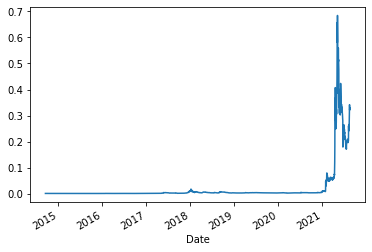

In [14]:
data['Close'].plot()

In [21]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,0.000293,0.000299,0.000260,0.000268,1463600,0,0
2014-09-18,0.000268,0.000325,0.000267,0.000298,2215910,0,0
2014-09-19,0.000298,0.000307,0.000275,0.000277,883563,0,0
2014-09-20,0.000276,0.000310,0.000267,0.000292,993004,0,0
2014-09-21,0.000293,0.000299,0.000284,0.000288,539140,0,0
...,...,...,...,...,...,...,...
2021-08-13,0.264249,0.287188,0.261907,0.286808,3565092106,0,0
2021-08-14,0.286801,0.298456,0.277154,0.293113,4677579997,0,0
2021-08-15,0.294086,0.348722,0.287063,0.341441,8046171669,0,0


In [24]:
data['Close'].pct_change(7)

Date
2014-09-17         NaN
2014-09-18         NaN
2014-09-19         NaN
2014-09-20         NaN
2014-09-21         NaN
                ...   
2021-08-13    0.401196
2021-08-14    0.125881
2021-08-15    0.422404
2021-08-16    0.248419
2021-08-17    0.279262
Name: Close, Length: 2523, dtype: float64

<AxesSubplot:xlabel='Date'>

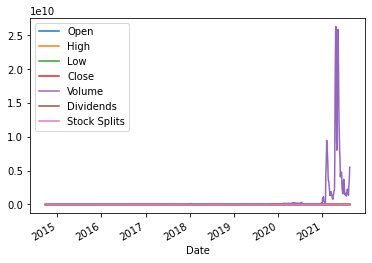

In [26]:
data.rolling(10).mean().plot()

In [32]:
stocktick=['AAPL', 'MSFT', 'GME','DOGE-USD']
stocktick

['AAPL', 'MSFT', 'GME', 'DOGE-USD']

importat pagaes to understand how to work with dates<br>
https://www.programiz.com/python-programming/datetime/strftime<br>
https://www.programiz.com/python-programming/datetime/strptime<br>
especially for the data format code

In [33]:
event_dates={'DOGE-USD':pd.Timestamp('5-8-2021'), 'GME':pd.Timestamp('22-1-2021'), 'MSFT':pd.Timestamp('22-1-2021'), 'AAPL':pd.Timestamp('22-1-2021')}
event_dates

{'DOGE-USD': Timestamp('2021-05-08 00:00:00'),
 'GME': Timestamp('2021-01-22 00:00:00'),
 'MSFT': Timestamp('2021-01-22 00:00:00'),
 'AAPL': Timestamp('2021-01-22 00:00:00')}

In [ ]:
# dt.datetime.now() - pd.Timedelta('1Y 3W 3H 567M')

In [36]:
findata=pd.DataFrame()

#loop to download all stocks historical data
for ticker in tqdm(stocktick):
    stock = yf.Ticker(ticker)
    startdate=(event_dates[ticker] - pd.Timedelta('1Y')).strftime('%Y-%m-%d')
    enddate=event_dates[ticker].strftime('%Y-%m-%d')
    print("downloading ticker {} from {} to {}".format(ticker, startdate, enddate))
    
    hist = stock.history(start=startdate, end=enddate)
    hist.loc[:,"ticker"]=ticker

    #concatenate history data of a given stock onto the financial datafram (findata)
    findata=pd.concat([findata,hist], axis=0)
findata    

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

downloading ticker AAPL from 2020-01-22 to 2021-01-22


 25%|█████████████████████                                                               | 1/4 [00:00<00:00,  3.35it/s]

downloading ticker MSFT from 2020-01-22 to 2021-01-22


 50%|██████████████████████████████████████████                                          | 2/4 [00:00<00:00,  3.16it/s]

downloading ticker GME from 2020-01-22 to 2021-01-22


 75%|███████████████████████████████████████████████████████████████                     | 3/4 [00:00<00:00,  3.40it/s]

downloading ticker DOGE-USD from 2020-05-07 to 2021-05-08


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.13it/s]


,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2020-01-21,78.250892,78.702350,77.957318,78.097939,110843200,0.0,0.0,AAPL
2020-01-22,78.593807,78.941655,78.280500,78.376717,101832400,0.0,0.0,AAPL
2020-01-23,78.430981,78.835566,77.870967,78.754158,104472000,0.0,0.0,AAPL
2020-01-24,79.005798,79.765632,78.332303,78.527199,146537600,0.0,0.0,AAPL
2020-01-27,76.491912,76.913768,75.214006,76.218079,161940000,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...
2021-05-03,0.373631,0.445567,0.373631,0.441707,10526649978,0.0,0.0,DOGE-USD
2021-05-04,0.440274,0.605998,0.400800,0.541334,38238126181,0.0,0.0,DOGE-USD
2021-05-05,0.537355,0.695262,0.523822,0.657633,42525098292,0.0,0.0,DOGE-USD


## Example 7 bis

In [32]:
stocktick=['AAPL', 'MSFT', 'GME','DOGE-USD']
stocktick

['AAPL', 'MSFT', 'GME', 'DOGE-USD']

In [37]:
findata=pd.DataFrame()

#loop to download all stocks historical data
for ticker in tqdm(stocktick):
    stock = yf.Ticker(ticker)
    
    hist = stock.history(start="2020-01-01")
    hist.loc[:,"ticker"]=ticker

    #concatenate history data of a given stock onto the financial datafram (findata)
    findata=pd.concat([findata,hist], axis=0)
findata    

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.63it/s]


,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2019-12-31,71.525832,72.450958,71.424684,72.443558,100805600,0.0,0.0,AAPL
2020-01-02,73.082501,74.158118,72.823469,74.096443,135480400,0.0,0.0,AAPL
2020-01-03,73.307008,74.153188,73.146654,73.376083,146322800,0.0,0.0,AAPL
2020-01-06,72.478106,74.000243,72.221535,73.960770,118387200,0.0,0.0,AAPL
2020-01-07,73.970641,74.232143,73.388432,73.612930,108872000,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...
2021-08-13,0.264249,0.287188,0.261907,0.286808,3565092106,0.0,0.0,DOGE-USD
2021-08-14,0.286801,0.298456,0.277154,0.293113,4677579997,0.0,0.0,DOGE-USD
2021-08-15,0.294086,0.348722,0.287063,0.341441,8046171669,0.0,0.0,DOGE-USD


In [59]:
findata.loc[:,['ticker','Close']].set_index('ticker', append=True).unstack('ticker').dropna(how='any').index.weekday.unique()

Int64Index([1, 3, 4, 0, 2], dtype='int64', name='Date')

In [63]:
returns=findata.loc[:,['ticker','Close']].set_index('ticker', append=True).unstack('ticker').dropna(how='any').pct_change().dropna()
returns

Close                              
ticker          AAPL  DOGE-USD       GME      MSFT
Date                                              
2020-01-02  0.022816 -0.009369  0.037829  0.018516
2020-01-03 -0.009722  0.067695 -0.068146 -0.012452
2020-01-06  0.007968  0.148252 -0.005102  0.002585
2020-01-07 -0.004703 -0.012180 -0.056410 -0.009118
2020-01-08  0.016086 -0.057542  0.036232  0.015928
...              ...       ...       ...       ...
2021-08-10 -0.003354  0.001666 -0.012909 -0.006555
2021-08-11  0.001786  0.030848 -0.001698  0.001781
2021-08-12  0.020773 -0.005059  0.022484  0.009967
2021-08-13  0.001410  0.086719  0.001047  0.010490
2021-08-16  0.013548  0.118222  0.008676  0.005976

[405 rows x 4 columns]

<AxesSubplot:xlabel='Date'>

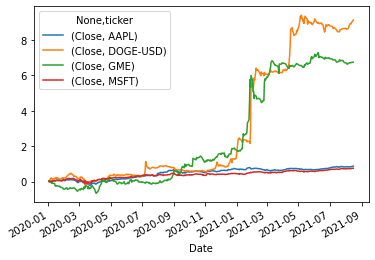

In [67]:
returns.cumsum().plot()

<AxesSubplot:xlabel='Date'>

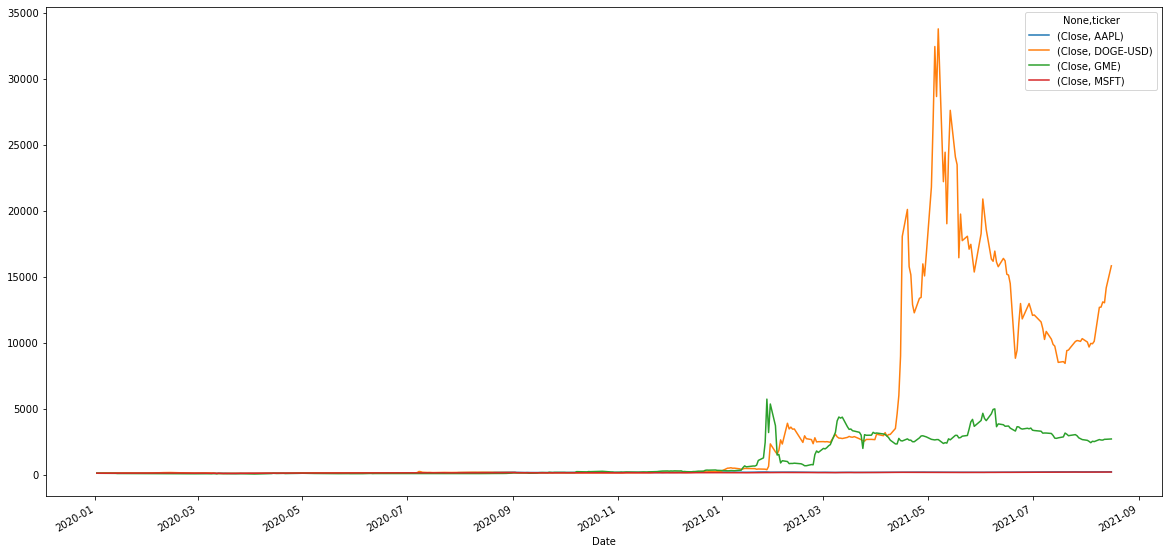

In [78]:
returns.add(1).cumprod().mul(100).plot(figsize=(20,10))

In [64]:
returns.describe()

Close                                    
ticker        AAPL    DOGE-USD         GME        MSFT
count   405.000000  405.000000  405.000000  405.000000
mean      0.002137    0.022543    0.016641    0.001853
std       0.025299    0.185775    0.143950    0.023311
min      -0.128647   -0.391114   -0.600000   -0.147390
25%      -0.009167   -0.023676   -0.035377   -0.008684
50%       0.001485    0.000849   -0.002252    0.001781
75%       0.015076    0.026212    0.038877    0.012350
max       0.119808    2.756432    1.348358    0.142169

# Pandas datareader

Documentation https://pandas-datareader.readthedocs.io/en/latest/  https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

## Example 1

In [ ]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2010-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('INPX', 'google', start_date, end_date)

In [ ]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

In [ ]:
print(all_weekdays)

In [ ]:
close.head(10)

In [ ]:
close.describe()

In [ ]:
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
msft = close.loc[:, 'MSFT']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

# Urllib

Documentation:https://docs.python.org/3/library/urllib.html https://docs.python.org/3/library/urllib.request.html

Descriptions of Fama French 5 factors (2x3) can be found on Kenneth French's website.<br>
http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

## Example 1

Read the original FF5 data

In [8]:
ff_url = "http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_daily_CSV.zip"
urllib.request.urlretrieve(ff_url,'F-F_Research_Data_Factors_daily_CSV.zip')

('F-F_Research_Data_Factors_daily_CSV.zip',
 <http.client.HTTPMessage at 0x2962c5420b8>)

In [9]:
zip_file = zipfile.ZipFile('F-F_Research_Data_Factors_daily_CSV.zip', 'r')
zip_file.extractall()
zip_file.close()

In [10]:
ff_factors_original = pd.read_csv('F-F_Research_Data_5_Factors_2x3_daily.csv', skiprows = 3)
ff_factors_original

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
0,19630701,-0.67,0.00,-0.34,-0.01,0.15,0.012
1,19630702,0.79,-0.27,0.27,-0.07,-0.19,0.012
2,19630703,0.63,-0.17,-0.10,0.17,-0.33,0.012
3,19630705,0.40,0.08,-0.27,0.08,-0.33,0.012
4,19630708,-0.63,0.04,-0.19,-0.29,0.13,0.012
...,...,...,...,...,...,...,...
14595,20210624,0.68,0.70,0.23,-0.39,0.23,0.000
14596,20210625,0.32,-0.48,0.46,-0.15,0.06,0.000
14597,20210628,0.23,-0.83,-1.59,-0.45,-0.17,0.000
14598,20210629,0.01,-0.37,-0.27,0.32,0.42,0.000


remove the files from dissertation folder

In [ ]:
ff_factors_original.info()

In [ ]:
ff_factors_original.rename(columns={'Unnamed: 0':'date'}, inplace=True)
ff_factors_original

In [ ]:
ff_factors_original['date']=pd.to_datetime(ff_factors_original['date'], format='%Y%m%d')
ff_factors_original.set_index('date', inplace=True)
ff_factors_original

In [ ]:
ff_factors_original=ff_factors_original.div(100) #transform percentages to real numbers
ff_factors_original

In [ ]:
rf=ff_factors_original['RF'].to_frame()
rf

In [ ]:
ff_factors_original.drop(columns='RF', inplace=True)
ff_factors_original

In [ ]:
ff_factors_original.describe()

ff_factors_original.plot(figsize=(20,10))

In [4]:
ff_factors_original.add(1).cumprod().plot(figsize=(20,10)) #gross returns

NameError: name 'ff_factors_original' is not defined

In [ ]:
ff_factors_original.describe()

In [ ]:
ff_factors_original.plot(figsize=(20,10))

In [ ]:
ff_factors_original.add(1).cumprod().plot(figsize=(20,10)) #gross returns

## Example 2

Direct download from URL csv. Right-click on "download" button on yahoo finance copy URL

In [155]:
url = "https://query1.finance.yahoo.com/v7/finance/download/DOGE-USD?period1=1594886617&period2=1626422617&interval=1d&events=history&includeAdjustedClose=true"
file=urllib.request.urlretrieve(url,'DOGE-USD.csv')
pd.read_csv('DOGE-USD.csv')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-16,0.003086,0.003098,0.002893,0.002995,0.002995,7.845784e+07
1,2020-07-17,0.002991,0.003084,0.002937,0.003061,0.003061,7.470537e+07
2,2020-07-18,0.003060,0.003629,0.003031,0.003473,0.003473,2.040809e+08
3,2020-07-19,0.003464,0.003753,0.003329,0.003382,0.003382,1.167462e+08
4,2020-07-20,0.003383,0.003433,0.003167,0.003239,0.003239,8.103862e+07
...,...,...,...,...,...,...,...
361,2021-07-12,0.216010,0.218965,0.204506,0.208048,0.208048,9.736027e+08
362,2021-07-13,0.208009,0.208062,0.198163,0.200003,0.200003,1.035890e+09
363,2021-07-14,0.199978,0.204483,0.187752,0.197324,0.197324,1.319171e+09
364,2021-07-15,0.197749,0.200840,0.180786,0.184888,0.184888,1.044559e+09
